## Importing the libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [12]:
data = pd.read_csv('data.csv')

In [13]:
data

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [14]:
data.shape

(4009, 4)

## Inserting New Feature For Label

In [15]:
data['Target'] = data['Label'].apply(lambda x: 'REAL' if x == 1 else 'FAKE')

In [16]:
data.head(3)

,URLs,Headline,Body,Label,Target
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,REAL
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,REAL
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,REAL


## Checking NaN data

In [17]:
data.isna().sum()

URLs         0
Headline     0
Body        21
Label        0
Target       0
dtype: int64

## Dropping NaN Values

In [18]:
data = data.dropna()

In [19]:
data.isna().sum()

URLs        0
Headline    0
Body        0
Label       0
Target      0
dtype: int64

## Lowering Text and Removing Punctuation

In [20]:
data['Headline'] = data['Headline'].str.lower()
data['Headline'] = data['Headline'].str.replace('[^\w\s]','')

In [21]:
data['Body'] = data['Body'].replace('\n',' ', regex=True)
data['Body'] = data['Body'].str.lower()
data['Body'] = data['Body'].str.replace('[^\w\s]','')
data

,URLs,Headline,Body,Label,Target
0,http://www.bbc.com/news/world-us-canada-414191...,four ways bob corker skewered donald trump,image copyright getty images on sunday morning...,1,REAL
1,https://www.reuters.com/article/us-filmfestiva...,linklaters war veteran comedy speaks to modern...,london reuters last flag flying a comedydrama...,1,REAL
2,https://www.nytimes.com/2017/10/09/us/politics...,trumps fight with corker jeopardizes his legis...,the feud broke into public view last week when...,1,REAL
3,https://www.reuters.com/article/us-mexico-oil-...,egypts cheiron wins tieup with pemex for mexic...,mexico city reuters egypts cheiron holdings l...,1,REAL
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,jason aldean opens snl with vegas tribute,country singer jason aldean who was performing...,1,REAL
...,...,...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,cnn and globalist exposed steve quayle and al...,vietnam is in great danger you must publish an...,0,FAKE
4004,http://beforeitsnews.com/sports/2017/09/trends...,trends to watch,trends to watch of readers think this story i...,0,FAKE
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,trump jr is soon to give a 30minute speech for...,trump jr is soon to give a 30minute speech for...,0,FAKE
4007,https://www.reuters.com/article/us-china-pharm...,china to accept overseas trial data in bid to ...,shanghai reuters china said it plans to accep...,1,REAL


In [22]:
x = data['Body']
y = data['Target']

## Splitting Datas into Train and Test

In [23]:
xtr, xts, ytr, yts = train_test_split(x, y, train_size=0.8)
print(len(xtr), len(ytr))
print(len(xts), len(yts))

3190 3190
798 798


## Filtering Out the Stopwords and Applying Multinomial Naive Bayes Model

In [24]:
pipeline = Pipeline([('tdidf', TfidfVectorizer(stop_words = 'english')),
                    ('nbmodel', MultinomialNB())])

In [25]:
pipeline.fit(xtr, ytr)

Pipeline(memory=None,
         steps=[('tdidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
pred = pipeline.predict(xts)
score = metrics.accuracy_score(yts, pred)
score

0.9223057644110275

## Checking Model Performance

In [27]:
cm = metrics.confusion_matrix(yts, pred)
print(cm)

[[358  51]
 [ 11 378]]


In [28]:
dfcm = pd.DataFrame(
        cm, columns=['Pred True', 'Pred Fake'], index=['Actual True', 'Actual Fake'])

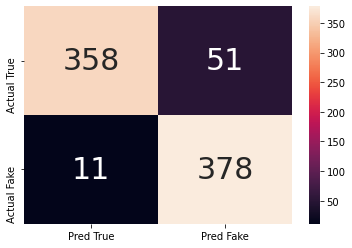

In [29]:
sb.heatmap(dfcm, annot=True, fmt='g', annot_kws={'size':30})

In [30]:
print(classification_report(yts, pred))

              precision    recall  f1-score   support

        FAKE       0.97      0.88      0.92       409
        REAL       0.88      0.97      0.92       389

    accuracy                           0.92       798
   macro avg       0.93      0.92      0.92       798
weighted avg       0.93      0.92      0.92       798



## Serialising The Model

In [31]:
with open('MODEL.pkl', 'wb') as myModel:
    pickle.dump(pipeline, myModel, protocol=pickle.HIGHEST_PROTOCOL)